# Get Stock prices and make predictions

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [6]:
import pandas_datareader as pdr

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#get dat
df = pdr.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [9]:
df.shape

(2003, 6)

c:\users\stubbe\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Close Price USD ($)')

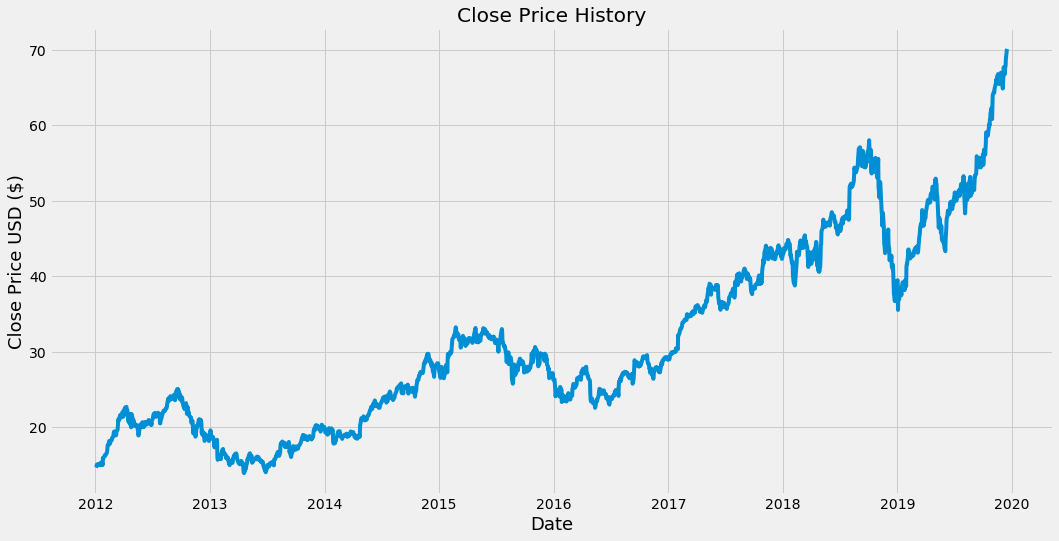

In [10]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)

In [21]:
#Create target variable
data  = df.filter(['Close'])
dataset = data.values
#training set
train_data_len = math.ceil(len(dataset)*0.8)
train_data_len


1603

In [22]:
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [23]:
# Scale data
scalar = MinMaxScaler(feature_range=(0,1))
scalar

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
scaled_data = scalar.fit_transform(dataset)

In [25]:
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [26]:
#Training Data Set
train_data = scaled_data[0:train_data_len,:]
#split
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [27]:
#convert the x and y date to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [29]:
#reshape ( D dimesional)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(1543, 60, 1)

In [37]:
model = Sequential()


In [38]:
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))


In [39]:
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [42]:
#Train Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 44s 25ms/step - loss: 0.0021


In [44]:
#create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[train_data_len-60: ,:]

In [45]:
x_test = []
y_test = dataset[train_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [46]:
x_test = np.array(x_test)

In [47]:
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
#get the model predicted values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [49]:
#Evaluete the model
#RMSE : if zero means perfect match
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.6006554508209228

In [54]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.1668121872272175

In [50]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]

In [51]:
valid['Predictions'] = predictions

<ipython-input-51-051906f0b5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


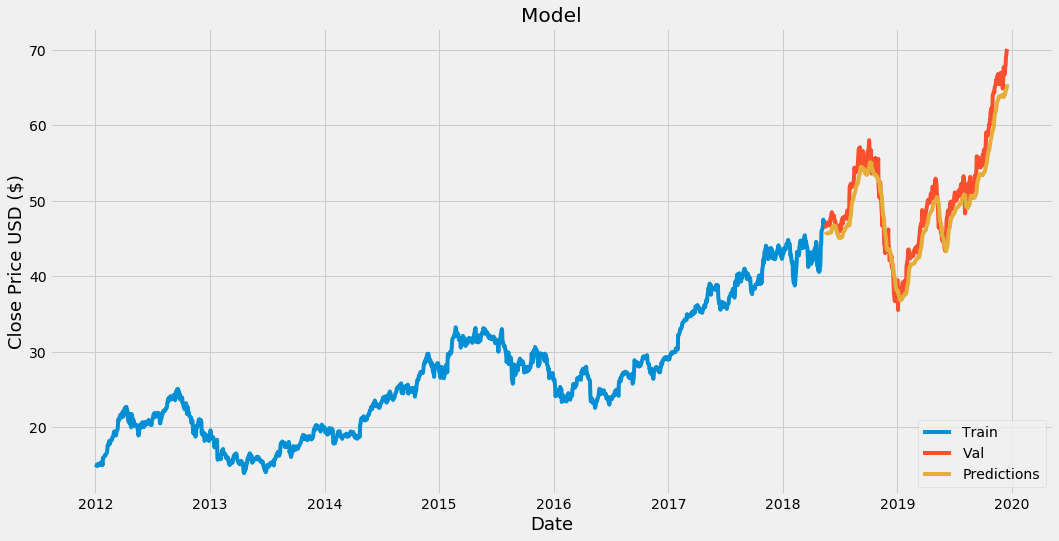

In [52]:
#visual data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')

In [53]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.537586
2018-05-18,46.577499,45.620270
2018-05-21,46.907501,45.637115
2018-05-22,46.790001,45.658165
2018-05-23,47.090000,45.662483
...,...,...
2019-12-11,67.692497,64.217682
2019-12-12,67.864998,64.429588
2019-12-13,68.787498,64.656746


In [57]:
#get the quote
apple_quote = pdr.DataReader('AAPL',data_source='yahoo',start = '2012-01-01',end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
#scale between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#Create an empty
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [59]:
#predict price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[[65.89527]]


In [60]:
apple_quote2 = pdr.DataReader('AAPL',data_source='yahoo',start = '2019-12-18',end='2019-12-18')

In [61]:
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400,69.115349
